In [1]:
import data as dt
import regressor as rg
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures


In [2]:
def nCr(n,r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

In [3]:
file_path = "CCPP/Folds5x2_pp.xlsx"

In [4]:
data = dt.readData(file_path)                            # dataset
test_set = data[0:1000]                     
training = data[1000:]

In [8]:
""" Part C : Multivariate polynomial regression """
n = 5    # 5 fold
M = 15
reg = rg.Regressor()

tr_rms = np.zeros(M-1)              # training erms

t_rms  = np.zeros(M-1)              # testing error root mean square

v_rms = np.zeros(M-1)              # validation error root mean square

valid_std = np.zeros(M-1)          # validation standar deviation

In [9]:
for m in range(1, M):
    valid_rms = np.zeros(n)
    train_rms = np.zeros(n)
    Weights = np.zeros((nCr(m+4,m),n)) 
    poly = PolynomialFeatures(m)
    for i in range(n):
        train_set, valid_set = dt.crossfold(training,n,i)
        Xtr = dt.getColumn(train_set, [['AT'], ['V'], ['AP'], ['RH']])
        Ytr = dt.getColumn(train_set, ['PE'])
        
        Xval = dt.getColumn(valid_set, [['AT'], ['V'], ['AP'], ['RH']])
        Yval = dt.getColumn(valid_set, ['PE'])
        
        Xtr_d = poly.fit_transform(Xtr)
        Xtr_d = Xtr_d[:,1:]
        
        Xval_d = poly.fit_transform(Xval)
        Xval_d = Xval_d[:,1:]
        
        W = reg.poly_fit(Xtr_d,Ytr,1)
        print(m, W.shape, W)
        Weights[:, i] = W.reshape(W.shape[0])
        
        yval_predicted = reg.predict(Xval_d, W,1)
        valid_rms[i] = reg.error_rms(Yval, yval_predicted.reshape(Yval.shape))
        
        ytrain_predicted = reg.predict(Xtr_d, W,1)
        train_rms[i] = reg.error_rms(Ytr, ytrain_predicted.reshape(Ytr.shape))
        

    v_rms[m-1] = np.mean(valid_rms)
    tr_rms[m-1]= np.mean(train_rms)
    valid_std[m-1]  = np.std(valid_rms)
    
    min_indx = np.argsort(valid_rms)[0]
    Wmin     = Weights[:,min_indx]
    
    Xtest = dt.getColumn(test_set, [['AT'], ['V'], ['AP'], ['RH']]) 
    Ytest = dt.getColumn(test_set, ['PE'])
    
    Xtest_d = poly.fit_transform(Xtest)
    Xtest_d = Xtest_d[:,1:]
    
    ytest_predicted = reg.predict(Xtest_d, Wmin, 1)
    t_rms[m-1]   = reg.error_rms(Ytest, ytest_predicted.reshape(Ytest.shape))
    
    
        
        

1 (5, 1) [[-1.99375708e+00]
 [-2.30689654e-01]
 [ 5.47920285e-02]
 [-1.60796838e-01]
 [ 4.62379581e+02]]
1 (5, 1) [[-1.97881925e+00]
 [-2.36550621e-01]
 [ 6.07895846e-02]
 [-1.57522917e-01]
 [ 4.56062715e+02]]
1 (5, 1) [[-1.95470318e+00]
 [-2.44364143e-01]
 [ 7.24873907e-02]
 [-1.56392078e-01]
 [ 4.44074245e+02]]
1 (5, 1) [[-1.97211554e+00]
 [-2.37282315e-01]
 [ 6.25604313e-02]
 [-1.58041553e-01]
 [ 4.54202222e+02]]
1 (5, 1) [[-1.97381545e+00]
 [-2.35935895e-01]
 [ 5.50187983e-02]
 [-1.59186576e-01]
 [ 4.61889955e+02]]
2 (15, 1) [[-1.13030661e+01]
 [-4.23744128e-01]
 [ 1.45461417e+01]
 [ 3.00303852e+00]
 [ 2.18647823e-02]
 [ 7.59878877e-03]
 [ 8.51457523e-03]
 [-5.28996664e-03]
 [-2.91442415e-04]
 [ 1.21230483e-05]
 [-1.27033164e-04]
 [-7.09949949e-03]
 [-2.69194082e-03]
 [-1.94447778e-03]
 [-6.93919892e+03]]
2 (15, 1) [[-6.89995149e+00]
 [-2.64147393e+00]
 [ 1.54103283e+01]
 [ 4.18032660e+00]
 [ 1.67020599e-02]
 [ 1.22897422e-02]
 [ 4.19291559e-03]
 [-6.28363371e-03]
 [-1.52343583e-03

4 (70, 1) [[ 1.90894942e+04]
 [-4.75683079e+03]
 [ 7.48361020e+03]
 [ 1.98992928e+04]
 [ 1.53381514e+01]
 [-2.25947770e+02]
 [-4.50495932e+01]
 [-4.28228940e+01]
 [ 1.15862745e+02]
 [ 8.34775999e+00]
 [-2.73833994e+01]
 [-9.00912605e+00]
 [-5.82414516e+01]
 [ 7.13619656e+00]
 [-3.17189113e-01]
 [ 7.68454767e-01]
 [-3.99792259e-02]
 [-1.01930313e-01]
 [-1.57195688e-01]
 [ 4.16595533e-01]
 [ 2.03882759e-01]
 [ 3.30875714e-02]
 [ 8.77234013e-02]
 [-5.44288061e-02]
 [-1.87567577e-02]
 [-2.20105163e-01]
 [-2.22215795e-02]
 [-2.11648275e-03]
 [ 4.71215772e-02]
 [ 3.32673426e-02]
 [ 4.53081013e-03]
 [ 5.69331696e-02]
 [-1.31943829e-02]
 [-5.84237541e-03]
 [-1.57831396e-04]
 [ 1.10835767e-04]
 [ 3.15006266e-04]
 [ 2.38793804e-05]
 [-1.27073646e-04]
 [-7.47105608e-04]
 [-5.48891143e-06]
 [ 2.46517902e-05]
 [ 9.36383015e-05]
 [ 2.67721169e-05]
 [ 3.71805691e-05]
 [ 1.55355998e-04]
 [-4.50576783e-05]
 [-1.91583732e-04]
 [-1.94915304e-04]
 [ 3.53096158e-06]
 [-7.37511544e-06]
 [-4.44813103e-05]
 [

5 (126, 1) [[-1.39320267e+05]
 [ 4.50121513e+05]
 [ 6.28235183e+04]
 [-2.23363539e+05]
 [ 2.92634361e+04]
 [-9.78046315e+03]
 [ 2.96987414e+02]
 [-9.82167160e+03]
 [ 5.81350637e+03]
 [-6.20770440e+02]
 [-2.42141187e+03]
 [-4.27135505e+01]
 [ 4.55127400e+02]
 [ 3.34294382e+02]
 [-4.20836810e+02]
 [ 3.25203718e+02]
 [-6.13769075e+01]
 [-3.40050172e+02]
 [-1.16962547e+01]
 [ 2.84707773e+00]
 [ 2.13155719e+02]
 [-6.05987162e-01]
 [ 4.13330892e+01]
 [-8.06195811e+01]
 [-5.77853317e+01]
 [-5.72747877e+00]
 [-2.76044161e+01]
 [ 8.14257957e-02]
 [ 2.09476877e+00]
 [ 3.01201426e+01]
 [-4.54126123e-02]
 [-4.34455016e-01]
 [ 4.04027283e-01]
 [-7.55662916e+00]
 [ 4.45919354e-01]
 [-5.08107409e-01]
 [ 7.98353381e-01]
 [ 4.04898346e-01]
 [ 1.22348676e-01]
 [-5.97906699e-01]
 [-3.84750025e-01]
 [ 3.55853716e-02]
 [ 6.50956033e-01]
 [ 1.42493140e-01]
 [ 6.85948837e-02]
 [-1.05887943e-03]
 [ 1.16123109e-01]
 [ 2.17458207e-02]
 [-4.04547149e-01]
 [-1.04595460e-01]
 [ 8.20703835e-04]
 [-5.22165831e-02]
 

6 (210, 1) [[-2.82576468e+07]
 [-1.57844658e+06]
 [ 1.82220976e+05]
 [ 2.46520552e+06]
 [ 2.63781685e+05]
 [-4.70482648e+04]
 [ 7.84382773e+04]
 [ 9.21931744e+02]
 [-5.82633533e+03]
 [ 6.11720927e+03]
 [ 3.61218561e+03]
 [-5.50947608e+02]
 [-7.96484409e+03]
 [-3.09243094e+01]
 [-2.13645373e+02]
 [ 7.96655537e+01]
 [-6.05596788e+02]
 [ 7.43579402e+01]
 [ 1.16090918e+02]
 [ 9.14103951e+01]
 [ 2.72933899e+01]
 [-7.27281648e+01]
 [ 3.47909565e+00]
 [-2.63882546e+01]
 [ 1.03559969e+00]
 [ 1.00444899e+01]
 [-4.21175527e+00]
 [-7.30160768e+00]
 [-7.84289133e+00]
 [ 5.79032009e+00]
 [ 5.38384811e-01]
 [ 8.51308198e+00]
 [-8.56873439e-01]
 [ 8.62444137e+00]
 [-5.75303268e-01]
 [ 1.72229986e+00]
 [ 5.06306793e-01]
 [-1.87776971e+00]
 [-8.33268578e-01]
 [-2.78129502e-01]
 [ 9.15694591e-01]
 [ 4.33012605e-01]
 [-1.61174566e-01]
 [-1.02939077e+00]
 [-7.03513199e-01]
 [-1.15001470e-01]
 [ 7.68387055e-02]
 [-4.97682705e-02]
 [-9.35234359e-02]
 [ 4.63178069e-02]
 [ 2.31656920e-02]
 [-6.28250313e-03]
 

7 (330, 1) [[-5.29593067e+08]
 [ 2.70482897e+08]
 [-2.82209232e+05]
 [-6.64350863e+07]
 [-6.77960012e+05]
 [ 4.29982082e+06]
 [ 1.58396339e+06]
 [ 1.67407379e+06]
 [-1.81657438e+05]
 [-7.97616149e+05]
 [-2.70452057e+05]
 [ 2.81334976e+03]
 [ 2.12172440e+05]
 [ 1.00287608e+05]
 [ 5.97638169e+04]
 [-5.05945378e+04]
 [ 2.24955076e+03]
 [ 1.93671447e+04]
 [ 4.02772328e+03]
 [-1.16787428e+04]
 [-1.13750160e+04]
 [-1.68343382e+03]
 [-4.67454075e+03]
 [ 1.84054828e+03]
 [ 5.56386236e+03]
 [-1.97900169e+02]
 [-1.32283687e+03]
 [ 8.00128875e+02]
 [ 9.49944002e+02]
 [ 4.53778787e+02]
 [-5.59598238e+00]
 [-2.45289371e+02]
 [-3.74297061e+02]
 [-9.49048637e+00]
 [-2.84560214e+02]
 [ 7.59142332e+01]
 [-1.04267562e+02]
 [-9.82296412e+01]
 [-8.46970685e+00]
 [ 9.46822408e+01]
 [ 2.89490532e+00]
 [-2.69640614e+00]
 [-3.37561386e+01]
 [-1.60833074e+01]
 [-2.70211599e+01]
 [-4.84290659e+00]
 [-1.21521030e+01]
 [ 1.05073260e+01]
 [ 2.23390310e+01]
 [ 1.61917281e-01]
 [ 7.29694198e-01]
 [ 4.24879326e+00]
 

7 (330, 1) [[-2.25363936e+08]
 [-5.96756413e+07]
 [ 3.47121419e+06]
 [ 3.08279187e+05]
 [ 1.56847373e+06]
 [ 5.01193672e+05]
 [ 6.34369829e+05]
 [ 1.36260608e+06]
 [ 4.32970281e+05]
 [ 1.38856109e+05]
 [-9.99408666e+04]
 [-9.63131147e+03]
 [-9.57231088e+02]
 [-4.41406694e+03]
 [-5.99744438e+03]
 [-6.02549580e+03]
 [-3.37068979e+03]
 [-7.99634541e+03]
 [ 2.24617008e+03]
 [-1.30730121e+03]
 [ 2.30645333e+03]
 [-5.76759673e+02]
 [-3.83973974e+03]
 [-5.55904582e+02]
 [-3.20504622e+02]
 [-1.16240996e+03]
 [-1.08597630e+01]
 [-9.41246282e+01]
 [ 3.03773583e+02]
 [ 1.00647723e+02]
 [ 9.13302451e+00]
 [ 1.70900393e+00]
 [ 2.49156117e+01]
 [-2.18888145e+01]
 [ 6.23293764e+01]
 [ 2.92703903e+01]
 [ 9.22210232e+00]
 [ 1.15330016e+01]
 [ 2.15969788e+00]
 [ 1.10327962e+01]
 [ 5.83010470e+00]
 [ 2.18236698e+00]
 [ 1.50890417e+01]
 [-1.37007683e+00]
 [-2.18938635e+00]
 [-4.48940681e+00]
 [-7.10860458e-01]
 [ 1.20284582e+00]
 [-4.89482068e+00]
 [ 2.34389357e+00]
 [ 1.46198007e-01]
 [ 3.62980431e+00]
 

7 (330, 1) [[ 6.97546655e+05]
 [-4.24575606e+07]
 [ 2.23168089e+07]
 [-1.69243164e+08]
 [-6.13652418e+05]
 [ 3.49569949e+05]
 [-4.20729876e+04]
 [ 5.57076161e+05]
 [ 3.59925014e+05]
 [ 2.35273386e+04]
 [-2.13823745e+05]
 [-6.01484138e+04]
 [ 4.78311092e+05]
 [-6.04248303e+04]
 [-3.16585246e+04]
 [-2.84826176e+04]
 [ 5.14934791e+03]
 [-1.55459859e+04]
 [ 2.60509098e+03]
 [ 1.44733108e+03]
 [-4.92596871e+02]
 [-1.52421003e+02]
 [ 5.58942532e+02]
 [-3.55286096e+03]
 [-6.32333262e+02]
 [-1.04128222e+03]
 [-5.22399844e+02]
 [ 8.18206544e+01]
 [ 8.05851736e+02]
 [-9.70643299e+01]
 [ 5.31544055e+01]
 [-4.54033949e+02]
 [ 2.38440097e+02]
 [ 9.62034611e+01]
 [ 2.82913270e+02]
 [ 7.87105149e+01]
 [ 5.80079132e+01]
 [ 1.20963628e+00]
 [-3.82876731e+01]
 [ 4.68670253e+01]
 [ 3.88224625e+01]
 [-8.25081954e+00]
 [ 2.94839984e+01]
 [ 7.04347976e+00]
 [ 1.13465509e+01]
 [-2.49086233e+00]
 [-1.85339329e+01]
 [-3.45194078e+00]
 [ 5.60064706e-02]
 [ 8.09435201e-02]
 [ 4.12823759e-01]
 [-2.66625719e+00]
 

8 (495, 1) [[ 2.46557216e+08]
 [-2.85479880e+08]
 [ 1.20641905e+07]
 [-4.38102430e+07]
 [-2.40439353e+06]
 [ 2.34387268e+06]
 [-6.90508878e+05]
 [-9.14139645e+05]
 [ 6.48004413e+04]
 [ 7.64048560e+05]
 [ 2.70410927e+05]
 [-3.40718306e+04]
 [ 1.24116780e+05]
 [ 6.03177362e+04]
 [ 3.60920126e+04]
 [-1.48098828e+04]
 [ 1.45971865e+03]
 [ 1.50823465e+04]
 [-2.16788384e+03]
 [-4.51009067e+03]
 [-4.37940845e+03]
 [ 7.22017030e+02]
 [ 1.98124179e+03]
 [ 1.24266173e+03]
 [ 5.44136142e+01]
 [-9.59542737e+01]
 [-2.72864855e+02]
 [-6.73387670e+02]
 [-4.85133213e+02]
 [-2.40619884e+02]
 [ 3.18080678e+01]
 [-1.16037151e+02]
 [-1.43319287e+02]
 [-1.12636479e+02]
 [-9.22880204e+01]
 [ 7.58616397e+00]
 [-6.12738514e+01]
 [-1.13964336e+01]
 [-3.01411874e+01]
 [ 2.73133131e+01]
 [-2.46184839e+01]
 [ 3.69831382e+00]
 [-2.54737845e+01]
 [-6.21978443e+00]
 [ 1.46029426e+01]
 [ 5.22462268e+00]
 [-6.80299534e+00]
 [ 2.19571371e+00]
 [ 8.03189900e+00]
 [ 1.93111627e+00]
 [-3.49436808e-01]
 [-1.31387794e+00]
 

8 (495, 1) [[-7.30654167e+08]
 [-5.33781604e+08]
 [-8.84879691e+06]
 [ 4.06234207e+08]
 [-2.43171055e+07]
 [ 7.46594942e+06]
 [ 2.64739204e+06]
 [-1.23391515e+06]
 [-2.86409900e+06]
 [ 1.46570953e+06]
 [ 6.56617129e+05]
 [ 2.54719073e+04]
 [-1.21324034e+06]
 [ 1.16916198e+05]
 [ 1.06273109e+05]
 [-6.58996659e+04]
 [ 6.57156584e+04]
 [ 3.89575558e+04]
 [ 1.75367070e+04]
 [-2.16039131e+04]
 [-1.07044271e+04]
 [-3.32496334e+03]
 [ 2.91380088e+03]
 [ 1.54979225e+02]
 [ 5.84003037e+03]
 [ 7.48686569e+03]
 [ 3.48853755e+02]
 [-1.27222041e+03]
 [-1.70731002e+03]
 [ 1.21657634e+03]
 [-2.30521449e+01]
 [ 1.21086798e+03]
 [-3.18385888e+02]
 [ 3.10563401e+01]
 [-3.83709967e+02]
 [ 1.09618911e+02]
 [-2.04869515e+02]
 [ 1.54105963e+02]
 [ 4.47371714e+01]
 [ 1.48563555e+02]
 [-6.08597993e+01]
 [-5.90420520e+01]
 [-7.66547704e+01]
 [-1.18573634e+01]
 [ 1.35614173e+01]
 [-3.76870318e+01]
 [ 2.45161246e+01]
 [ 2.04880421e+01]
 [ 2.14461169e+01]
 [ 1.16569834e+01]
 [ 1.68109265e+00]
 [-2.13484658e+00]
 

8 (495, 1) [[-2.06248871e+08]
 [ 9.59460396e+06]
 [ 1.58876078e+07]
 [-1.33026339e+08]
 [-6.14194330e+06]
 [ 7.16783366e+05]
 [ 6.30237746e+05]
 [-1.99382007e+05]
 [-1.62445110e+03]
 [-3.47321201e+04]
 [ 7.86911887e+04]
 [-4.62202624e+04]
 [ 3.81985572e+05]
 [-9.01762512e+04]
 [-1.75306324e+04]
 [ 3.82626583e+04]
 [ 1.55614616e+04]
 [-5.56202563e+03]
 [-1.04408803e+04]
 [-1.10009745e+03]
 [ 4.14298025e+03]
 [-6.84956244e+02]
 [ 1.05614189e+03]
 [-1.14503384e+03]
 [ 1.15455237e+03]
 [-1.30991139e+02]
 [-7.36206988e+02]
 [ 3.75675128e+01]
 [-2.37764947e+02]
 [ 2.75434547e+01]
 [ 4.51311876e+01]
 [-3.64862978e+02]
 [ 2.88913824e+02]
 [ 7.49088241e+01]
 [ 1.73291248e+01]
 [-2.33921155e+00]
 [ 2.51720898e+01]
 [ 6.47471197e+01]
 [-2.54969939e+01]
 [-7.15541028e+01]
 [-2.97834651e+01]
 [-1.26876765e+01]
 [ 9.92963375e+00]
 [ 1.34284848e+01]
 [-6.67725416e+00]
 [ 2.12990482e+01]
 [ 1.15958705e+01]
 [ 7.09367414e-02]
 [-7.91315081e+00]
 [-5.10159941e+00]
 [ 3.03854995e-01]
 [-1.50354988e+00]
 

8 (495, 1) [[ 1.08987706e+08]
 [-1.94375777e+08]
 [ 1.88565692e+07]
 [-1.87615655e+08]
 [ 4.76995702e+04]
 [-3.32331541e+06]
 [-2.31007805e+05]
 [ 1.58473452e+06]
 [ 2.20561546e+05]
 [ 6.45693246e+05]
 [ 1.48898925e+05]
 [-5.70814512e+04]
 [ 5.04693808e+05]
 [ 2.54307829e+05]
 [-9.08089463e+03]
 [ 5.79437501e+04]
 [-2.85067340e+03]
 [-6.09936556e+03]
 [-2.14942184e+04]
 [ 1.02439456e+04]
 [ 5.42304551e+03]
 [ 1.32471069e+02]
 [-4.43315002e+03]
 [-1.11601013e+03]
 [ 4.50856498e+03]
 [-1.55889486e+03]
 [ 7.68009002e+02]
 [-7.03867005e+02]
 [-3.67414149e+02]
 [-5.95981738e+01]
 [ 5.74666022e+01]
 [-4.25175801e+02]
 [-6.19688652e+02]
 [-1.81193463e+02]
 [ 1.22237266e+02]
 [-2.67040456e+02]
 [ 1.81555146e+01]
 [-2.86627283e+01]
 [ 6.51917272e+01]
 [-1.09420841e+02]
 [ 1.71364638e+01]
 [ 5.43354533e+00]
 [ 1.23705189e+01]
 [-8.94172096e+00]
 [ 9.67104643e-01]
 [ 4.18185932e+01]
 [-8.15486235e-02]
 [-1.05543128e+01]
 [-1.13165315e+01]
 [ 2.93502845e+00]
 [-1.66593460e-03]
 [ 4.21314703e+00]
 

9 (715, 1) [[-2.13434010e+08]
 [ 4.28055224e+08]
 [ 5.33610638e+07]
 [-6.54212129e+08]
 [-3.38486717e+07]
 [-4.90185638e+06]
 [ 5.07021850e+05]
 [ 1.17787006e+06]
 [-1.46499389e+05]
 [-1.23047723e+06]
 [ 6.13647141e+05]
 [-1.59814604e+05]
 [ 1.81087050e+06]
 [ 7.11118745e+05]
 [ 1.12716454e+05]
 [-6.71182736e+04]
 [ 1.06781710e+05]
 [-5.23962501e+03]
 [ 2.21208520e+03]
 [ 1.47350734e+04]
 [-2.08044247e+04]
 [-7.04129254e+02]
 [ 4.54081627e+02]
 [-1.05746671e+04]
 [ 9.29818367e+02]
 [ 1.28755515e+02]
 [ 9.49032865e+02]
 [ 1.19112658e+03]
 [-1.48564388e+03]
 [-1.71004512e+03]
 [ 1.66248100e+02]
 [-1.65223251e+03]
 [-1.43152395e+03]
 [-1.37652285e+03]
 [ 8.97575452e+02]
 [-6.92025547e+02]
 [-2.39638804e+02]
 [-1.41009192e+02]
 [ 2.54167440e+02]
 [ 1.33001410e+02]
 [ 5.42702667e+01]
 [-1.11108274e+02]
 [ 1.83044903e+01]
 [ 2.44449511e+01]
 [-4.68009968e+00]
 [-9.67271704e+00]
 [-2.46655508e+01]
 [-1.37961590e+01]
 [ 4.25711953e+01]
 [ 1.09451482e+01]
 [ 7.08469416e-01]
 [-3.88373234e+00]
 

9 (715, 1) [[ 3.65996755e+09]
 [-3.98800643e+08]
 [ 2.11994623e+07]
 [-1.72433603e+08]
 [ 1.46400032e+06]
 [-1.43632740e+07]
 [-1.13356815e+07]
 [ 1.47320424e+07]
 [ 9.59856387e+05]
 [ 1.57161396e+06]
 [-1.28822547e+06]
 [-6.73031088e+04]
 [ 4.97699602e+05]
 [ 1.04529238e+06]
 [ 5.48812595e+05]
 [-7.55222921e+05]
 [-8.38822296e+03]
 [-1.39729523e+04]
 [ 3.34283130e+05]
 [ 3.35977532e+04]
 [-3.12431329e+04]
 [ 1.26118251e+04]
 [-4.11659654e+04]
 [-1.35761184e+04]
 [-4.83614370e+04]
 [ 4.37198353e+02]
 [ 8.65827130e+02]
 [-2.34795866e+03]
 [ 1.74932542e+03]
 [ 7.44381691e+03]
 [ 7.17047960e+01]
 [-4.36535354e+02]
 [-2.75748343e+03]
 [-1.93177391e+03]
 [ 1.18590449e+03]
 [ 2.22666788e+03]
 [-1.29703894e+03]
 [ 1.40657329e+03]
 [-9.92322777e+02]
 [ 1.47472526e+03]
 [ 3.58764195e+02]
 [ 1.26955775e+01]
 [-5.54428280e+00]
 [ 1.44099736e+02]
 [ 1.58519375e+02]
 [-6.42494371e+02]
 [-2.92783653e+02]
 [-2.44569914e+01]
 [ 7.55398734e+01]
 [-3.22422877e+01]
 [-5.86221466e+00]
 [ 3.89796735e+01]
 

9 (715, 1) [[ 5.84347664e+08]
 [-6.95407643e+08]
 [-4.03959374e+05]
 [ 2.12465785e+08]
 [ 2.39995440e+07]
 [ 8.81832245e+06]
 [-3.40485845e+06]
 [ 9.99890352e+06]
 [-6.29936872e+05]
 [ 1.99316090e+06]
 [-1.42550512e+06]
 [ 9.06200572e+03]
 [-6.91920914e+05]
 [ 4.15473744e+05]
 [-1.34690218e+05]
 [-1.44396056e+05]
 [-6.17662533e+04]
 [-6.40494576e+04]
 [ 9.24906359e+04]
 [-2.45901476e+04]
 [-5.38530554e+03]
 [ 6.46423349e+03]
 [-2.52568855e+04]
 [-2.15998127e+04]
 [-1.21947554e+04]
 [ 1.95911978e+03]
 [-1.58866464e+03]
 [-1.98407202e+03]
 [ 5.03112270e+03]
 [-1.02807292e+03]
 [-1.92258614e+01]
 [ 7.33982769e+02]
 [-6.16099731e+02]
 [-1.60559101e+03]
 [-1.71247094e+02]
 [ 1.33758400e+03]
 [ 2.48526471e+02]
 [ 2.66638333e+01]
 [-5.38850123e+02]
 [ 2.62632262e+02]
 [ 1.62168014e+02]
 [ 5.33520463e+01]
 [ 9.99915131e+01]
 [ 9.75512437e+01]
 [-5.67957282e+01]
 [-1.71964528e+02]
 [ 5.22953658e+01]
 [ 2.36666103e+01]
 [ 6.24490654e+00]
 [ 3.76813236e+00]
 [-5.08092013e+00]
 [ 2.09217267e+01]
 

9 (715, 1) [[ 1.59789559e+09]
 [ 7.55373270e+08]
 [-6.43487243e+07]
 [ 1.07954964e+08]
 [-1.32345374e+08]
 [ 1.72642626e+07]
 [-2.99469455e+06]
 [-2.23821099e+06]
 [-3.95783643e+05]
 [-2.39671382e+06]
 [-2.80507212e+05]
 [ 1.82853191e+05]
 [-2.09447415e+05]
 [-2.69967499e+05]
 [ 1.23761224e+04]
 [-1.03903480e+05]
 [ 3.85957442e+05]
 [-9.79945986e+03]
 [-1.90250585e+03]
 [-4.78731798e+04]
 [ 2.43986447e+04]
 [ 2.02804077e+02]
 [ 3.59254730e+03]
 [-5.29045563e+03]
 [ 6.54296022e+03]
 [ 2.76759355e+02]
 [ 4.64591241e+03]
 [ 2.62887352e+03]
 [-1.84566376e+02]
 [-5.00958188e+02]
 [-1.71368816e+02]
 [ 7.04270183e+01]
 [ 8.61401623e+02]
 [ 3.75538138e+02]
 [-5.73708920e+02]
 [ 6.72375442e+02]
 [ 2.37965103e+01]
 [-6.33279775e+02]
 [ 7.25273806e+01]
 [ 1.91312324e+02]
 [ 5.27905913e+02]
 [-3.74464746e+02]
 [ 3.88314679e+01]
 [-1.57511645e+02]
 [-7.08324376e+01]
 [ 3.23874811e-01]
 [-1.52727924e+02]
 [ 4.45636306e+01]
 [-5.09871999e+01]
 [ 4.11239233e+01]
 [ 2.18046828e+00]
 [-3.23302432e-01]
 

9 (715, 1) [[ 1.93276493e+09]
 [ 8.88853821e+08]
 [-4.83412631e+07]
 [-1.90686860e+08]
 [ 1.06454675e+07]
 [-2.36404326e+07]
 [-6.14879087e+06]
 [ 9.50602716e+06]
 [ 2.60437381e+06]
 [-2.42205295e+06]
 [ 5.99402320e+05]
 [ 1.43284123e+05]
 [ 4.01918060e+05]
 [ 5.25739854e+05]
 [-5.13384278e+04]
 [-3.37084158e+04]
 [-1.16337447e+04]
 [-8.99685873e+04]
 [ 5.91101106e+04]
 [ 5.85802259e+04]
 [ 2.41541149e+04]
 [ 6.81481795e+03]
 [-2.49915251e+04]
 [-4.89874297e+03]
 [-2.39282105e+04]
 [-6.42472851e+03]
 [-1.27236229e+04]
 [ 2.22409832e+03]
 [-8.30390903e+02]
 [-7.18520094e+02]
 [-1.42615786e+02]
 [-2.32099501e+02]
 [-1.17637575e+03]
 [-1.83182232e+02]
 [ 3.26592424e+02]
 [ 5.27505472e+02]
 [ 8.41822852e+01]
 [ 4.04522280e+02]
 [ 1.52862202e+02]
 [ 2.16739263e+01]
 [ 1.04195322e+02]
 [-6.98772269e+00]
 [ 1.76752419e+02]
 [ 2.78047659e+01]
 [-3.39401373e+01]
 [-1.15344680e+02]
 [ 7.39327265e+01]
 [-4.65926696e+01]
 [-5.37174348e+01]
 [-5.56996948e+00]
 [-2.90622897e+00]
 [ 2.16661335e+01]
 

10 (1001, 1) [[ 7.26361229e+07]
 [ 4.90255764e+08]
 [ 1.94548104e+06]
 ...
 [-8.45208523e-15]
 [ 1.24482704e-14]
 [-1.57742925e+05]]
10 (1001, 1) [[ 2.31614811e+08]
 [-1.54816767e+09]
 [ 1.84699306e+08]
 ...
 [-1.97628983e-14]
 [-2.97911785e-16]
 [ 1.28481484e+07]]
10 (1001, 1) [[-1.95784955e+10]
 [ 6.62884613e+09]
 [ 2.97804352e+08]
 ...
 [-6.92399189e-14]
 [ 6.48548657e-14]
 [-1.34195372e+07]]
10 (1001, 1) [[ 3.68079801e+09]
 [ 1.06708624e+09]
 [-1.07289583e+08]
 ...
 [ 2.89649529e-13]
 [ 2.54480787e-13]
 [-2.89014425e+07]]
10 (1001, 1) [[ 3.28484674e+10]
 [ 1.40321084e+10]
 [-1.11289823e+09]
 ...
 [ 8.47902286e-14]
 [-4.79830778e-13]
 [ 1.09093652e+08]]
11 (1365, 1) [[-2.31572007e+10]
 [ 1.58497796e+10]
 [ 3.14941101e+08]
 ...
 [ 1.98381053e-15]
 [-2.04669612e-15]
 [ 8.02132914e+07]]
11 (1365, 1) [[-4.50874384e+09]
 [ 1.99544333e+09]
 [-2.20703355e+07]
 ...
 [ 7.04118145e-17]
 [ 1.41336331e-17]
 [ 8.39285706e+06]]
11 (1365, 1) [[-2.91365257e+10]
 [-4.04219741e+10]
 [ 5.19609184e+09]

Best Order is :  2


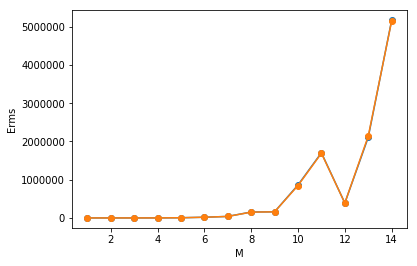

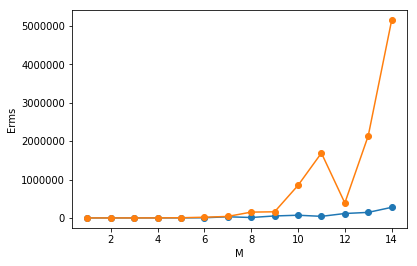

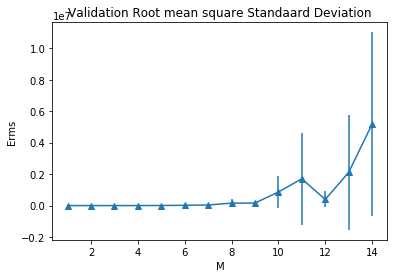

In [10]:
min_indx = np.argsort(v_rms)[0]
print("Best Order is : " , min_indx+1 )

dt.plotrms(v_rms, tr_rms,0)
dt.plotrms(t_rms, tr_rms,1)


x  = range(1,len(v_rms)+1)
plt.title("Validation Root mean square Standaard Deviation")
plt.xlabel("M")
plt.ylabel("Erms")
plt.errorbar(x, v_rms, valid_std, marker='^')
plt.show()